# Exploratory Data Analysis (EDA) Notebook 

This notebook presents the initial exploratory data analysis (EDA) conducted on the provided dataset. It includes a variety of comments and observations that have shaped the subsequent modeling approach.
 
**Please note** that this notebook serves primarily as a reference and is included in the submission to provide context for the modeling decisions made later. It is not intended as a polished report but rather as a working document that captures the exploratory phase of the project.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as msno

<a id="data-loading"></a>
# 2. Data Loading

In [4]:
df = pd.read_csv('../data/toydata_mltest.csv')

In [5]:
df.head()

,id,c1,c2,c3,c4,c5,c6,player_group,n1,n2,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,R0I,YW5kc,ZXM,NaN,True,LTA0OjAw,A,147.175163,508.833307,...,198.480790,1.513241e+09,0.877958,563.317119,18.827356,0.111096,0.910215,0.270997,38.999087,0.073268
1,1,QVI,aW9z,cHQ,aHVhd,True,KzAzOjAw,B,288.359771,1028.901212,...,384.252343,7.030908e+08,7.915538,1059.667759,NaN,0.360950,2.965243,0.349473,77.952363,0.185909
2,2,SVQ,aW9z,ZXM,NaN,True,LTA1OjAw,A,186.063223,650.402814,...,249.778061,5.050894e+09,1.573227,700.112963,NaN,0.155331,1.327952,0.140478,49.276629,0.097967
3,3,R0I,YW5kc,ZXM,NaN,True,LTA0OjAw,A,144.562911,499.384425,...,195.028589,2.703625e+09,0.843725,554.100930,NaN,0.108525,0.885378,0.152239,38.323737,0.071742
4,4,QlI,YW5kc,ZW4,YXBwb,True,NaN,A,77.314738,259.654122,...,105.726136,-1.728980e-01,0.274720,313.339044,10.028185,0.054445,0.363698,1.058591,21.585558,0.037120


<a name="preliminary-data-exploration"></a>
# 3. Preliminary Data Exploration

Some preliminary EDA and sanity checks, checking data quality etc.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            50000 non-null  int64  
 1   c1            45054 non-null  object 
 2   c2            44943 non-null  object 
 3   c3            50000 non-null  object 
 4   c4            42445 non-null  object 
 5   c5            50000 non-null  bool   
 6   c6            44913 non-null  object 
 7   player_group  50000 non-null  object 
 8   n1            50000 non-null  float64
 9   n2            50000 non-null  float64
 10  n3            50000 non-null  float64
 11  n4            50000 non-null  float64
 12  n5            50000 non-null  float64
 13  n6            50000 non-null  float64
 14  n7            50000 non-null  float64
 15  n8            50000 non-null  float64
 16  n9            2257 non-null   float64
 17  n10           50000 non-null  float64
 18  n11           50000 non-nu

In [7]:
df.describe()

/Users/kathleenshort/poetry-project-test/.venv/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,id,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,5.000000e+04,50000.000000,2257.000000,5.000000e+04,5.000000e+04,50000.000000,50000.000000,5.000000e+04
mean,24999.500000,227.578926,828.004272,256.614221,15.317680,303.721336,1.076003e+09,5.654541e+05,771.964324,29.956782,inf,1.476606e+05,1.611488,62.121726,1.754451e+09
std,14433.901067,324.091843,1234.472288,934.947025,11.423516,431.831310,1.320375e+09,4.455893e+06,859.684161,34.456366,NaN,2.333745e+07,28.146543,84.047901,3.632668e+11
min,0.000000,-1.000000,-1.000000,0.000000,-0.301107,-1.000000,-6.895300e-01,4.000000e-06,-1.000000,-0.255812,-1.120900e-02,0.000000e+00,0.000000,-0.383024,1.000000e-06
25%,12499.750000,19.758466,63.443962,0.267965,3.639679,28.039383,1.595560e-01,5.909050e-02,91.290971,3.398109,1.813400e-02,6.903325e-02,0.029953,7.688947,1.209025e-02
50%,24999.500000,115.802650,395.954717,2.675413,14.763222,156.950788,1.027463e+01,5.378455e-01,452.172722,15.197287,8.285100e-02,6.358940e-01,0.178986,31.016539,5.591350e-02
75%,37499.250000,326.494508,1171.616582,37.354398,27.318234,434.337850,2.028225e+09,1.568305e+01,1193.731095,46.250992,4.995708e-01,3.831268e+00,0.708854,89.016613,2.300437e-01
max,49999.000000,9147.840007,36968.405059,9222.749526,31.000000,12432.493258,7.691516e+09,7.364047e+07,4943.121649,132.885266,inf,5.098116e+09,5062.155998,2307.458796,8.112489e+13


In [8]:
df.groupby('player_group')[['n1', 'n10']].describe()

/Users/kathleenshort/poetry-project-test/.venv/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


n1                                                  \
                count        mean         std         min         25%   
player_group                                                            
A             35280.0   77.766107   80.046706   -1.000000    7.597781   
B             14720.0  586.641171  398.381076  276.182156  363.077131   

                                                       n10            \
                     50%         75%          max    count      mean   
player_group                                                           
A              48.303494  132.979942   276.174109  35280.0  0.066173   
B             479.858992  673.456624  9147.840007  14720.0       inf   

                                                                            
                   std       min       25%       50%         75%       max  
player_group                                                                
A             0.077516 -0.011209  0.009071  0.035932    0.097630  0.326123  
B                  NaN  0.326145  0.692975  2.383547  126.115099       inf

**Initial observations**

- There is a minimum -1 in column `n1`, which is the pre-test engagement intensity. What does negative engagement intensity mean? Negative `n1` only appears in group A.
- There is clearly a big difference in the averge pre-test engagement intensity between groups, indicating the players have not been randomly assigned.
- There are infinite values in column `n10`, which only appear in group B.

## Sanity Checks

In [9]:
# Ensure id is unique for each sample, as each row should represent an individual player
print(df['id'].nunique())
print(df.id.duplicated().sum())

50000
0


In [10]:
# Check for duplicated rows excluding id
dupes = df.drop('id', axis=1).duplicated()
print("There are {} duplicated rows.".format(dupes.sum()))

There are 0 duplicated rows.


In [11]:
# Checking for unique players in each group

group_counts = df.groupby('id')['player_group'].nunique()

# Players who are in more than one group will have a count greater than 1
overlap_players = group_counts[group_counts > 1]

print(f"Number of players in more than one group: {overlap_players.count()}")

Number of players in more than one group: 0


In [12]:
# Percentage of players in each group

group_A = df[df['player_group'] == "A"]
group_B = df[df['player_group'] == "B"]

players_A = group_A.id.nunique()
players_B = group_B.id.nunique()
total_players = df.id.nunique()

print(f"Percentage of players in group A: {players_A/total_players*100:.2f}%")
print(f"Percentage of players in group B: {players_B/total_players*100:.2f}%")
print(f"Players in A, Players in B, Total Players: {players_A, players_B, total_players}")


Percentage of players in group A: 70.56%
Percentage of players in group B: 29.44%
Players in A, Players in B, Total Players: (35280, 14720, 50000)


We have an imbalanced dataset with a roughly 70/30 split in groups A and B.

## Missing Data

In [13]:
# Check missing values
df.isnull().sum()

id                  0
c1               4946
c2               5057
c3                  0
c4               7555
c5                  0
c6               5087
player_group        0
n1                  0
n2                  0
n3                  0
n4                  0
n5                  0
n6                  0
n7                  0
n8                  0
n9              47743
n10                 0
n11                 0
n12                 0
n13                 0
n14                 0
dtype: int64

In [14]:
# Percentage of missing values for each column with missing data
missing_percentages = df[['c1', 'c2', 'c4', 'c6', 'n9']].isnull().mean() * 100
print(missing_percentages)

c1     9.892
c2    10.114
c4    15.110
c6    10.174
n9    95.486
dtype: float64


In [15]:
from scipy.stats import chi2_contingency
# Assuming 'df' is your DataFrame and 'player_group' is the column with group identifiers
df['n9_missing'] = df['n9'].isnull().astype(int)

# Calculate the contingency table for missingness of n9 across player groups
contingency_table = pd.crosstab(df['player_group'], df['n9_missing'])

# Perform the Chi-squared test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print(f"Chi-squared Test statistic: {chi2}")
print(f"P-value: {p_value}")

# Interpret the p-value
if p_value < 0.05:
    print("There is a statistically significant difference in the missingness of 'n9' between the groups.")
else:
    print("There is no statistically significant difference in the missingness of 'n9' between the groups.")

Chi-squared Test statistic: 0.3752286410036049
P-value: 0.54016791430733
There is no statistically significant difference in the missingness of 'n9' between the groups.


In [16]:
df.groupby('player_group')['n9_missing'].mean()

player_group
A    0.954478
B    0.955774
Name: n9_missing, dtype: float64

Columns `c1`, `c2`, `c4`, `c6` and `n9` have missing values we will need to deal with, either by dropping or imputing. 

Given column `n9` has over 95% missing values, and the values seem to be MCAR regarding the player groups, I will drop this column from the analysis/modelling completely as it is unlikely to be informative even with imputation.


In [17]:
# Check if missing values are evenly distributed across player groups
cat_columns_missing = ['c1', 'c2', 'c4', 'c6']
df.groupby('player_group')[cat_columns_missing].apply(lambda x: x.isnull().mean())*100

,c1,c2,c4,c6
player_group,,,,
A,14.019274,0.00000,21.414399,14.418934
B,0.000000,34.35462,0.000000,0.000000


Missing `c1`, `c4`, `c6` are all in player group A, while missing `c2` is only in player group B. 

For the categorical columns, missing percentage is around ~10-15%. A decision on how to handle these, either by imputing or dropping the rows if we suspect there are data quality issues, would normally be made with context on what these features represent and why they are missing. 

Considering the non-random distribution, listwise deletion could introduce bias. Imputation using within group data to preserve group characteristics (e.g. with most frequent, or predict the category based on other features), or treating missing values as a separate unknown category might be a better approach here.


In [18]:
# Check if the same observations have missing values - could mean data collection error 

# Count the number of missing values per row
df['missing_values_count'] = df[cat_columns_missing].isnull().sum(axis=1)
# Check the distribution of the count of missing values
print("Distribution of count of missing values per row:")
print(df['missing_values_count'].value_counts())

Distribution of count of missing values per row:
missing_values_count
0    27644
1    22067
2      289
Name: count, dtype: int64


Appears missing values are distributed across different rows. Correlation between missing values is not very strong - see below.

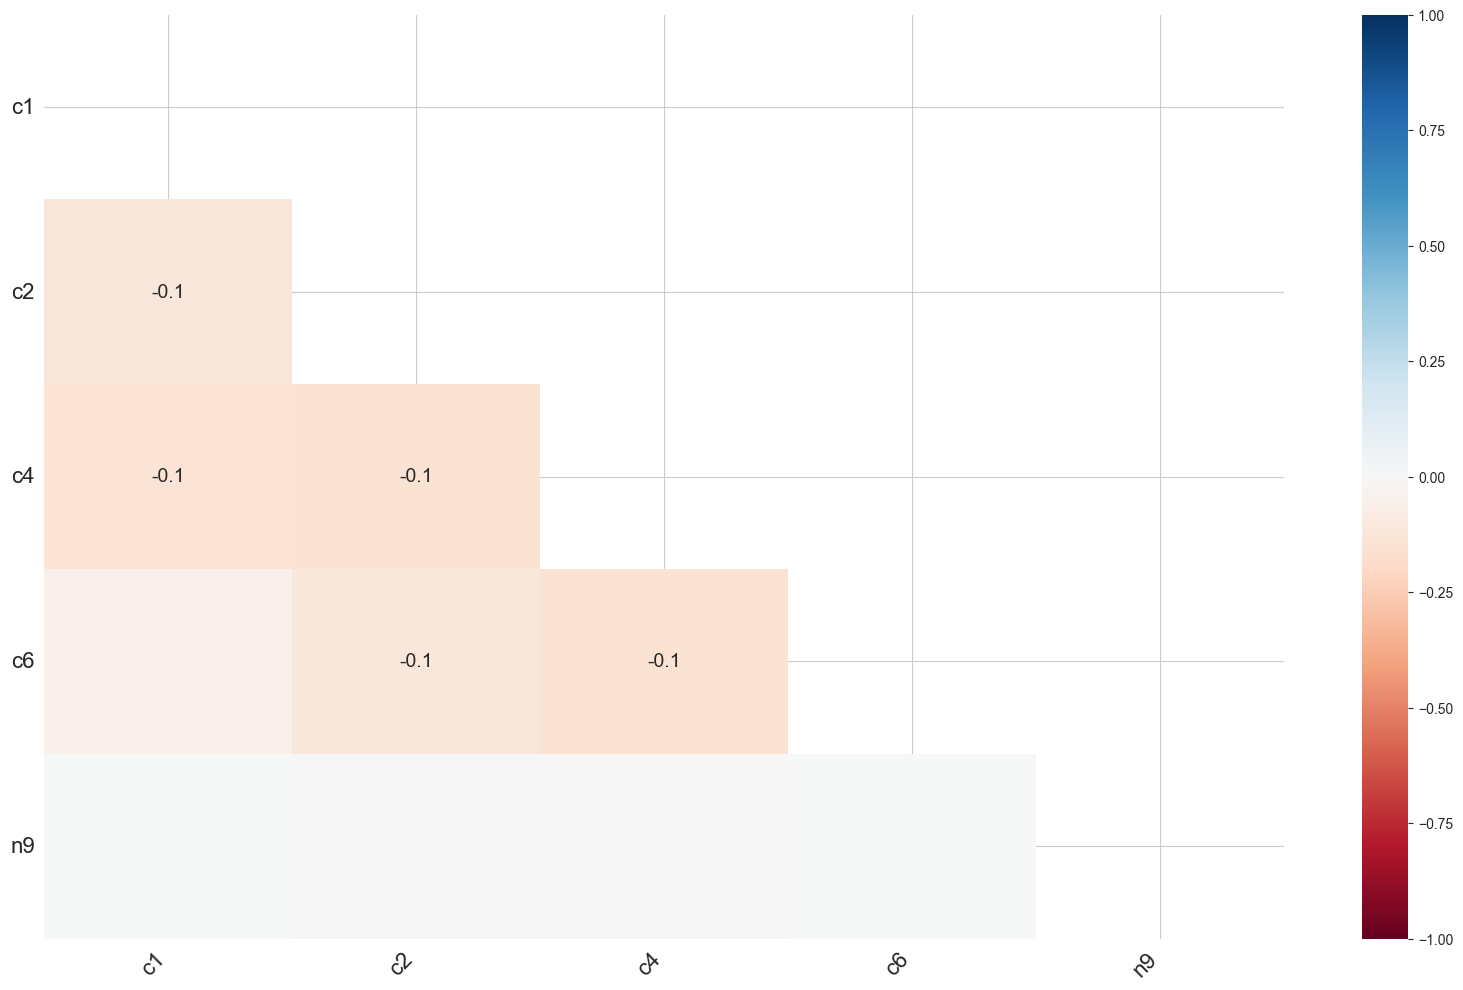

In [19]:
msno.heatmap(df)
plt.show()

<a name="exploratory-data-analysis"></a>
# 4. Exploratory Data Analysis

This sections contains in-depth exploratory analysis of the data.

## Data Distribution

The features we have information on are: 

- n1: engagement intensity (accumulated over the past 30 days immediately
before the test)
- n13: engagement intensity (calculated in the same way as “n1” and accumulated
over the first 7 days of the test)
- n14: monetization metric (unit unknown; a higher number indicates more spend)
for the corresponding player during the first 7 days of the test.

Steps to take:
- Normalise the n1 and n13 engagement metrics to account for different measurement timeframes.



### Engagement and Monetization Metrics: `n1`, `n13`, `n14`

In [20]:
group_metrics = df.groupby('player_group')[['n1','n13', 'n14']].describe()
group_metrics

n1                                                  \
                count        mean         std         min         25%   
player_group                                                            
A             35280.0   77.766107   80.046706   -1.000000    7.597781   
B             14720.0  586.641171  398.381076  276.182156  363.077131   

                                                       n13              ...  \
                     50%         75%          max    count        mean  ...   
player_group                                                            ...   
A              48.303494  132.979942   276.174109  35280.0   21.820021  ...   
B             479.858992  673.456624  9147.840007  14720.0  158.714401  ...   

                                           n14                              \
                     75%          max    count          mean           std   
player_group                                                                 
A              35.352569    74.444739  35280.0  4.191779e-02  4.452804e-02   
B             185.994554  2307.458796  14720.0  5.959413e+09  6.695068e+11   

                                                                    
                   min       25%       50%       75%           max  
player_group                                                        
A             0.000001  0.006444  0.024295  0.065159  1.732890e-01  
B             0.173297  0.279915  0.504498  1.234959  8.112489e+13  

[2 rows x 24 columns]

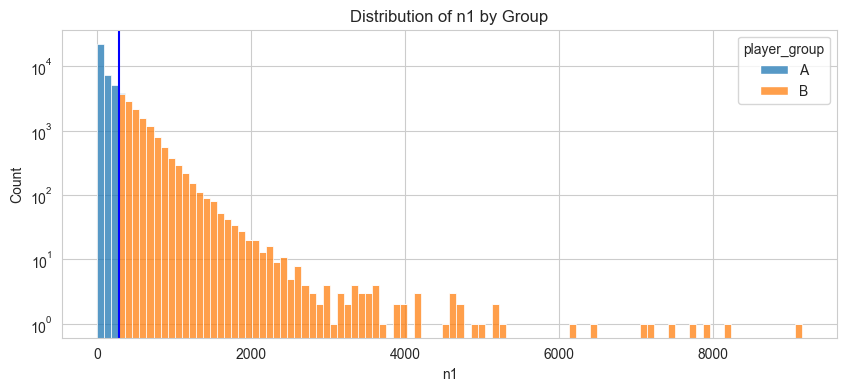

In [21]:
# Distribution plots for each group
for feature in ['n1']:
    plt.figure(figsize=(10, 4))
    sns.histplot(data=df, x=feature, hue='player_group', stat='count', common_norm=False, bins=100, multiple='stack')
    plt.title(f'Distribution of {feature} by Group')
    plt.axvline(group_metrics.loc['A']['n1']['max'], color='blue')
    # plt.axvline(group_metrics.loc['B']['n1']['min'], color='orange')
    plt.yscale('log')
    plt.show()

We see a clear distinction in pre-test engagement levels between two groups. The appears to be a strict cutoff of `n1` ~ 276 separating the groups, potentially implying players were assigned to Game Design based on their engagement levels. Group A seems to represent more casual players with much lower engagement rates while Group B appears to represent more highly engaged players, including extreme outliers in relation most players. This highly skewed distribution is typical of engagement metrics in mobile gaming, where a small number of players are highly active - driving a significant portion of game interaction/revenue - while the majority have much lower engagement. 

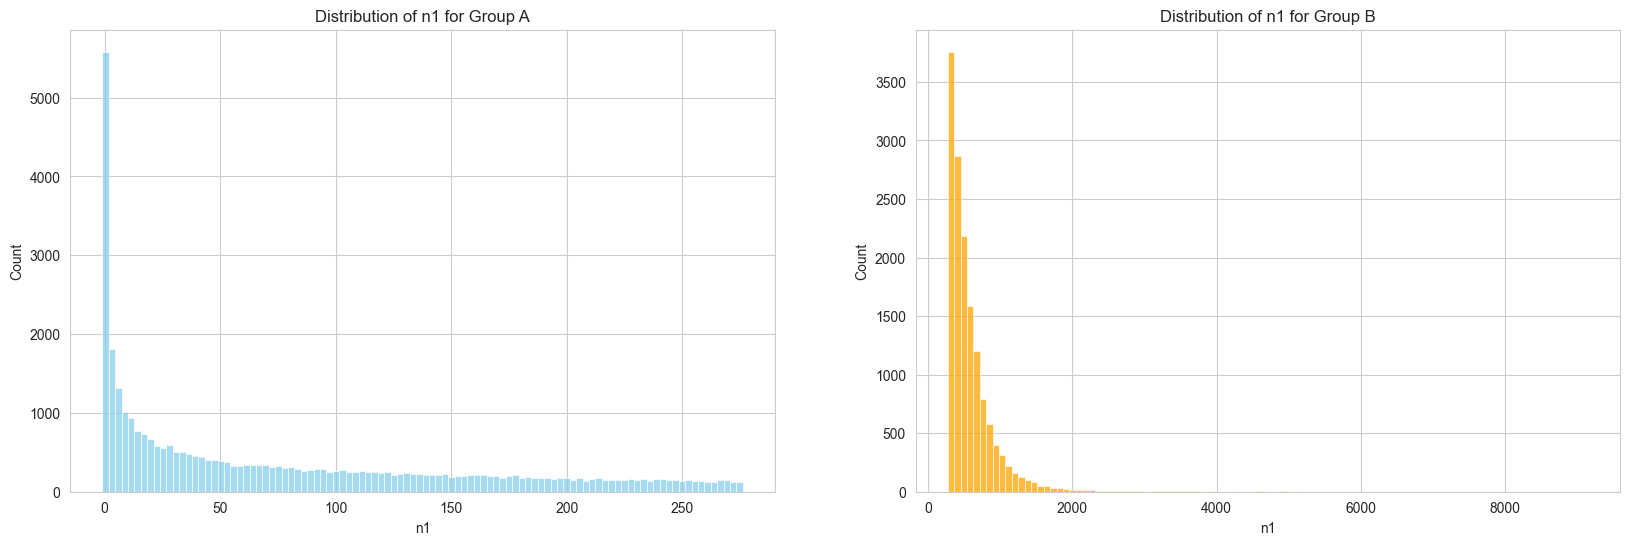

In [22]:
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Define range for each group
range_group_a = (df[df['player_group'] == 'A']['n1'].min(), df[df['player_group'] == 'A']['n1'].max())
range_group_b = (df[df['player_group'] == 'B']['n1'].min(), df[df['player_group'] == 'B']['n1'].max())

# Calculate the number of bins for each group to get a reasonable bin width
bins_group_a = int((range_group_a[1] - range_group_a[0]) / 50)
bins_group_b = int((range_group_b[1] - range_group_b[0]) / 500)

# Plot histogram for Group A on the first subplot
sns.histplot(df[df['player_group'] == 'A'], x='n1', bins=100, ax=axes[0], color='skyblue', kde=False)
axes[0].set_title('Distribution of n1 for Group A')

# Plot histogram for Group B on the second subplot
sns.histplot(df[df['player_group'] == 'B'], x='n1', bins=100, ax=axes[1], color='orange', kde=False)
axes[1].set_title('Distribution of n1 for Group B')

# plt.tight_layout()
plt.show()

## Summary

- Distinct Engagement Levels: There is a significant difference in engagement between Group A and Group B, with Group B showing higher levels of engagement.
- Engagement Threshold: A notable cutoff at n1 = 276 appears to separate the groups, suggesting a systematic variation in engagement possibly influenced by different game designs.
- Highly Skewed Distribution: Both groups exhibit a highly skewed distribution of engagement, which is characteristic of mobile game metrics where a few players are much more engaged than the majority. In particular in group B, a percentage of highly engaged users ("power users" or "whales" in gaming and marketing) contribute disproportionately to the overall metrics.
- The dataset is clearly not the result randomized controlled experiment in which players are randomly assigned to groups A or B, which would be the ideal scenario to perform a hypothesis test to answer task 1. Instead, it appears that players have been selected to be exposed to one design or the other based on their profile/characteristics. In order to estimate the impact of the game designs on `n13`, we need to account for the pre-existing differences between groups. 

## During-test engagement `n13`

In [25]:
# Post test engagement
df.groupby('player_group')[['n13']].describe()

n13                                               \
                count        mean        std        min        25%   
player_group                                                         
A             35280.0   21.820021  20.634553  -0.383024   4.318829   
B             14720.0  158.714401  98.749460  74.447050  99.691058   

                                                   
                     50%         75%          max  
player_group                                       
A              14.656728   35.352569    74.444739  
B             133.410302  185.994554  2307.458796

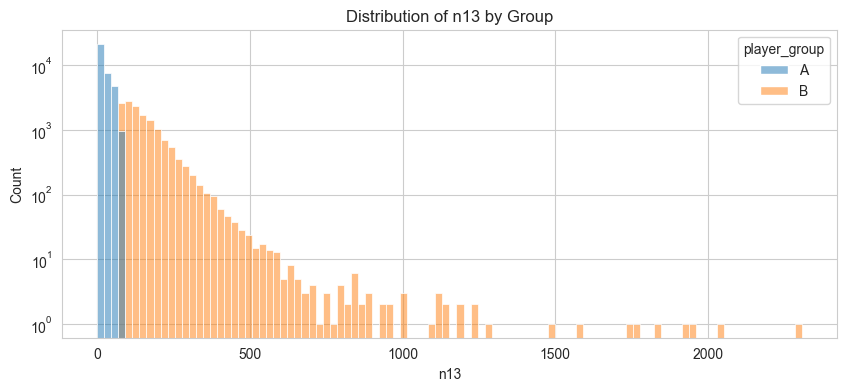

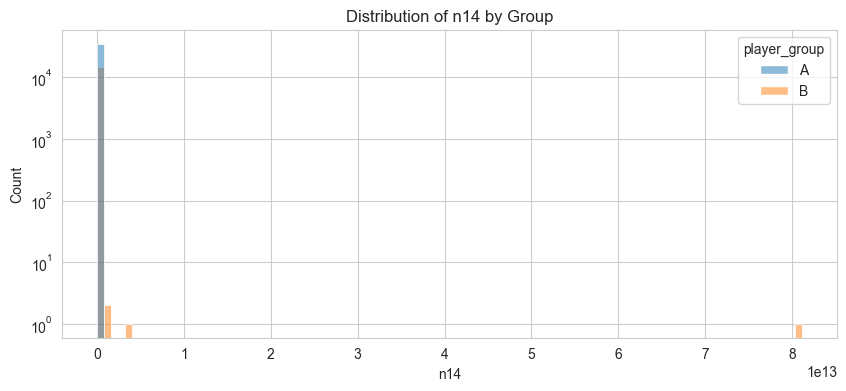

In [26]:
# Distribution of during-test engagement/monetization 
for feature in ['n13', 'n14']:
    plt.figure(figsize=(10, 4))
    sns.histplot(data=df, x=feature, hue='player_group', stat='count', common_norm=False, bins=100)
    plt.title(f'Distribution of {feature} by Group')
    plt.yscale('log')
    plt.show()

**Post-test engagement `n13`**: unsurpisingly, given clear differences in pre-test engagement between groups, we see a similar differences in the distribution of during-test engagement levels between the two groups.

### During-test Monetization `n14`

In [27]:
df.groupby('player_group')[['n14']].describe()

n14                                                  \
                count          mean           std       min       25%   
player_group                                                            
A             35280.0  4.191779e-02  4.452804e-02  0.000001  0.006444   
B             14720.0  5.959413e+09  6.695068e+11  0.173297  0.279915   

                                                
                   50%       75%           max  
player_group                                    
A             0.024295  0.065159  1.732890e-01  
B             0.504498  1.234959  8.112489e+13

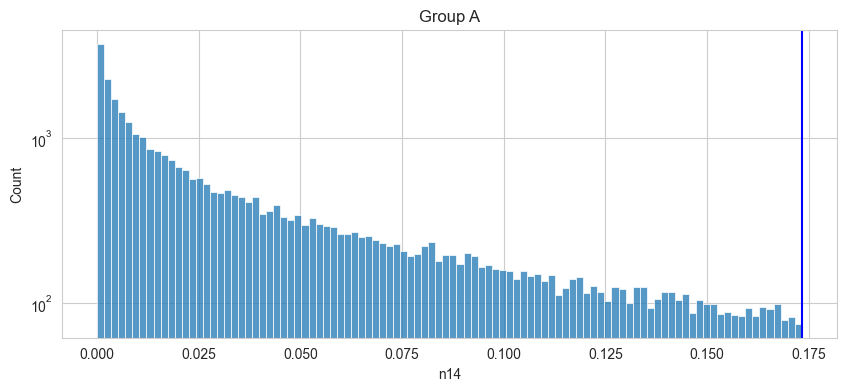

In [28]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df[df['player_group']=='A'], x='n14', stat='count', common_norm=False, bins=100)
plt.axvline(group_metrics.loc['A']['n14']['max'], color='blue')
plt.title(f'Group A')
plt.yscale('log')
plt.show()

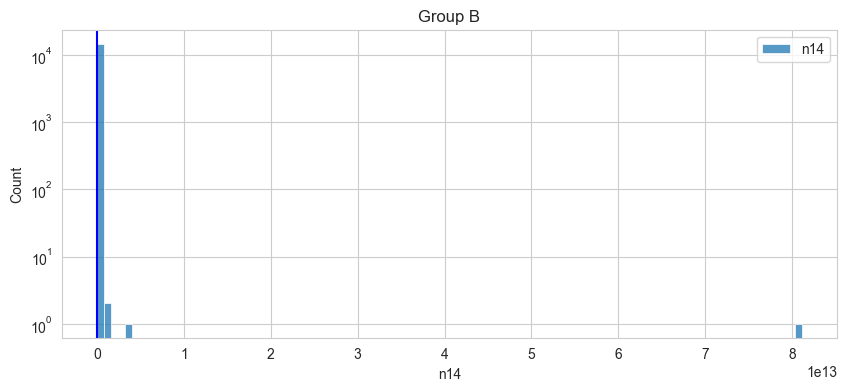

In [29]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df[df['player_group']=='B'], x='n14', stat='count', common_norm=False, bins=100, label='n14')
plt.axvline(group_metrics.loc['B']['n14']['min'], color='blue')
plt.title(f'Group B')
plt.yscale('log')
plt.legend()
plt.show()

**Monetization `n14`**: 

- Distribution is heavily skewed by a few extreme outliers in group B.
- There again appears to be clear cut-off separating the groups, implying the outcome of n14 during test is influence by pre-test features.


### Outliers and players with infinite values in `n10`

Players with infinite values for n10 seem to correspond to extreme outliers in n13 and especially n14. Below I investigate the distribution without these rows:

In [30]:
inf_rows = df.index[(df['n10'] == np.inf) | (df['n10'] == -np.inf)]
inf_rows.shape[0]

293

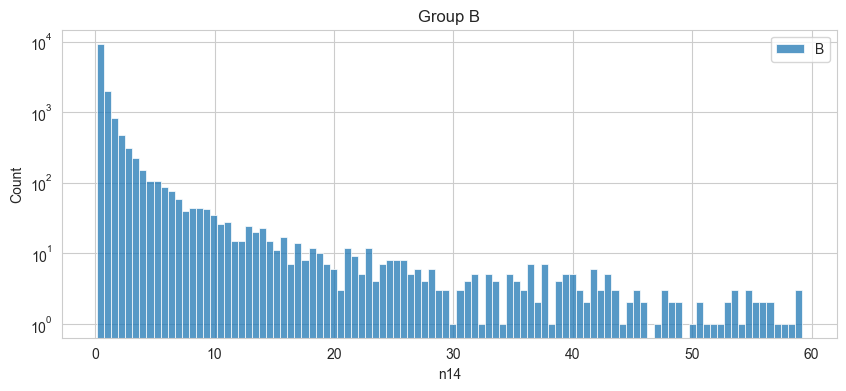

In [31]:
# Inspect distribution without those rows
inf_rows = df.index[(df['n10'] == np.inf) | (df['n10'] == -np.inf)]

# Plot without this outlier|
plt.figure(figsize=(10, 4))
# sns.histplot(data=df[df['player_group']=='A'], x='n14', stat='count', common_norm=False, bins=100, label='A')
sns.histplot(data=group_B.drop(index=inf_rows), x='n14', stat='count', common_norm=False, bins=100, label='B')
plt.title(f'Group B')
plt.yscale('log')
plt.legend()
plt.show()


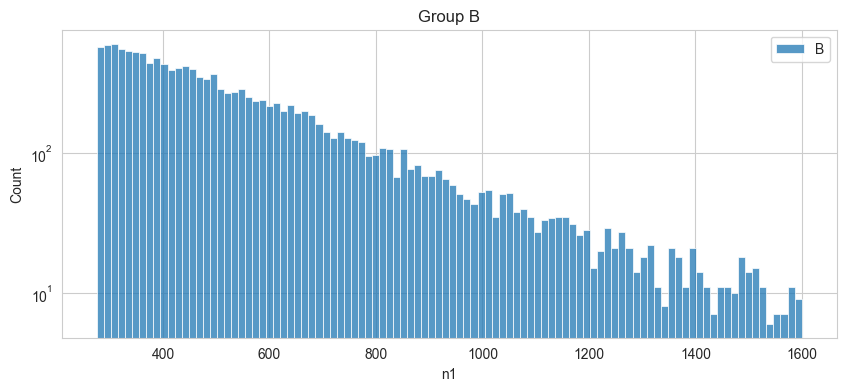

In [32]:
# Without those outliers, does pre-test engagement change a lot?
plt.figure(figsize=(10, 4))
# sns.histplot(data=df[df['player_group']=='A'], x='n14', stat='count', common_norm=False, bins=100, label='A')
sns.histplot(data=group_B.drop(index=inf_rows), x='n1', stat='count', common_norm=False, bins=100, label='B')
plt.title(f'Group B')
plt.yscale('log')
plt.legend()
plt.show()

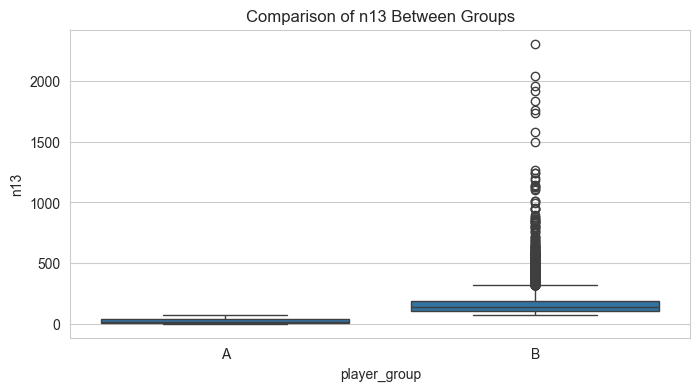

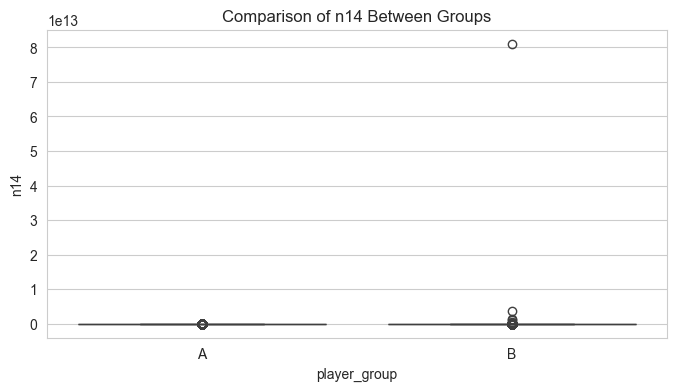

In [34]:
# Boxplots to compare n13 and n14 across groups
for feature in ['n13', 'n14']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='player_group', y=feature, data=df)
    plt.title(f'Comparison of {feature} Between Groups')
    plt.show()

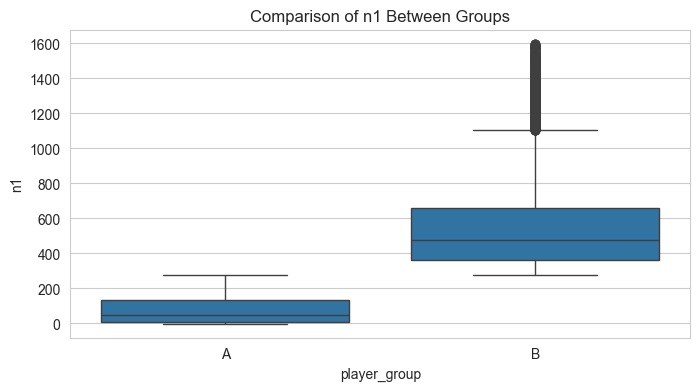

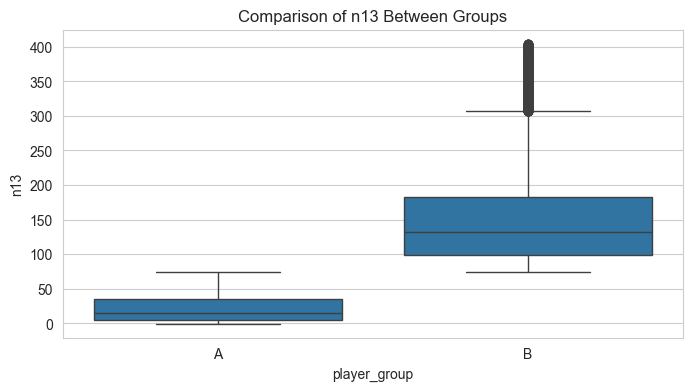

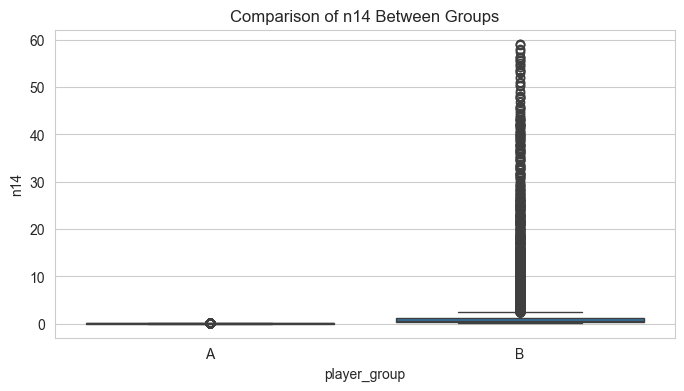

In [35]:
# Boxplots with inf n10 removed 

df_noinf = df.drop(index=inf_rows)

for feature in ['n1', 'n13', 'n14']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='player_group', y=feature, data=df_noinf)
    plt.title(f'Comparison of {feature} Between Groups')
    plt.show()

**Summary**

- The extreme outlying players in terms of n13 and n14 are related to playes with infinite values in feature `n10`. This could either mean data collection errors for those players, or these players represent super players - if the latter, removing them could bias our results.

# Investigate negative n1, n13 values in Group A

We would expect engagement and monetization to always be zero or positive, but not negative. 

In [36]:
# Engagement, monetization metrics should not be negative
print((df['n1'] >= 0).all())
print((df['n13'] >= 0).all())
print((df['n14'] >= 0).all())

False
False
True


In [37]:
df[df['n1'] <0].groupby('player_group')['n1'].describe()

,count,mean,std,min,25%,50%,75%,max
player_group,,,,,,,,
A,3670.0,-0.714481,0.289263,-1.0,-0.969402,-0.823366,-0.504414,-0.000506


In [38]:
df[df['n13'] <0].groupby('player_group')['n13'].describe()

,count,mean,std,min,25%,50%,75%,max
player_group,,,,,,,,
A,680.0,-0.163157,0.101284,-0.383024,-0.250717,-0.156072,-0.075459,-0.000211


In [39]:
# Find users with negative values for both n1 and n13
negative_n1_users = set(df[df['n1'] < 0].index)
negative_n13_users = set(df[df['n13'] < 0].index)

# Find the intersection of the two sets
users_negative_both = negative_n1_users.intersection(negative_n13_users)

# Print the count of users with negative values for both metrics
print(f"Users with negative values for both n1 and n13: {len(users_negative_both)}")

Users with negative values for both n1 and n13: 680


In [40]:
# Check if all users with a negative n13 value also have a negative n1 value
if negative_n13_users == users_negative_both:
    print("All users with a negative n13 value also have a negative n1 value.")
else:
    print("Not all users with a negative n13 value have a negative n1 value.")

All users with a negative n13 value also have a negative n1 value.


There are 3670 negative values for `n1` and 680 for `n13`, all occuring in group A. Every player with negative in-test engagement had a negative pre-test engagement. 

We could either:
- drop these observations if we think there's a data collection error, as it's a small fraction of total observations
- assume negative value means no engagement for that player during the measured time period?

If the negative values represent no engagement from those players in the past 30 days or first 7 days of test, it might make sense to drop these observations from our analysis - if the players were not engaged at all during the test, they were not exposed to any game design and thus including them in the analysis could bias results. Assuming this, we can drop the 680 players who were not engaged at all before/during test.
 
For players who were not engaged pre-test, but engaged during the test, it's more tricky - they had to become engaged to be exposed to a game design, so can we really attribute any increased engagement to the game design? A more in-depth analysis of these player activity logs is needed to fully understand what happens in these cases.

### Engagement increase/decline

In [41]:
# To look at whether engagement increased/decline, normalise n1, n13 to daily avg engagement intensity

# Calculate daily averages for each user
df['n1_daily'] = df['n1'] / 30  # Daily average over the 30 days before the test
df['n13_daily'] = df['n13'] / 7  # Daily average over the 7 days of the test

group_metrics_daily = df.groupby('player_group')[['n1_daily','n13_daily']].mean()
group_metrics_daily

,n1_daily,n13_daily
player_group,,
A,2.592204,3.117146
B,19.554706,22.673486


In [42]:
group_metrics_daily['pct_increase'] = (
        (group_metrics_daily['n13_daily']- group_metrics_daily['n1_daily'])/group_metrics_daily['n1_daily']*100)
group_metrics_daily

,n1_daily,n13_daily,pct_increase
player_group,,,
A,2.592204,3.117146,20.250811
B,19.554706,22.673486,15.949001


In both groups, appears the average daily engagement increased, but relative increase for group A is 20% vs 15% for group B.

In [43]:
# Instances where there is no decline in engagement
df_no_decline = df[df['n13_daily'] >= df['n1_daily']]
print("Instances with no decline in engagement:")
df_no_decline.groupby('player_group')[['n13_daily', 'n14']].describe()

Instances with no decline in engagement:


n13_daily                                                         \
                 count       mean        std        min        25%        50%   
player_group                                                                    
A              35090.0   3.134253   2.946557  -0.033304   0.632188   2.112921   
B              14720.0  22.673486  14.107066  10.635293  14.241580  19.058615   

                                         n14                              \
                    75%         max    count          mean           std   
player_group                                                               
A              5.073632   10.634963  35090.0  4.214465e-02  4.454128e-02   
B             26.570651  329.636971  14720.0  5.959413e+09  6.695068e+11   

                                                                    
                   min       25%       50%       75%           max  
player_group                                                        
A             0.000040  0.006618  0.024535  0.065515  1.732890e-01  
B             0.173297  0.279915  0.504498  1.234959  8.112489e+13

In [44]:
# Players whose engagement decreased during test
mask = (df['n1_daily'] > 0) & (df['n1_daily'] > df['n13_daily'])
decline = (df['n1_daily'] > df['n13_daily'])

df_decline = df[decline]
df_decline

,id,c1,c2,c3,c4,c5,c6,player_group,n1,n2,...,n9,n10,n11,n12,n13,n14,n9_missing,missing_values_count,n1_daily,n13_daily
540,540,SU4,YW5kc,ZW4,c2Ftc,True,KzAyOjAw,A,-0.999680,-0.999445,...,NaN,-0.009187,0.0,0.019571,-0.260320,0.000029,1,0,-0.033323,-0.037189
757,757,SU4,YW5kc,ZW4,c2Ftc,True,KzAyOjAw,A,-0.999938,-0.999902,...,NaN,-0.009755,0.0,0.054337,-0.307335,0.000014,1,0,-0.033331,-0.043905
821,821,SU4,YW5kc,ZW4,c2Ftc,True,KzAyOjAw,A,-0.999994,-0.999991,...,NaN,-0.010354,0.0,2.217903,-0.346568,0.000005,1,0,-0.033333,-0.049510
1070,1070,SU4,YW5kc,ZW4,c2Ftc,True,KzAyOjAw,A,-0.999990,-0.999985,...,-0.241058,-0.010242,0.0,0.058943,-0.340077,0.000006,0,0,-0.033333,-0.048582
1130,1130,SU4,YW5kc,ZW4,c2Ftc,True,KzAyOjAw,A,-0.999835,-0.999723,...,NaN,-0.009432,0.0,0.098029,-0.281775,0.000022,1,0,-0.033328,-0.040254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48882,48882,SU4,YW5kc,ZW4,c2Ftc,True,KzAyOjAw,A,-0.999365,-0.998858,...,NaN,-0.008903,0.0,9.762378,-0.233482,0.000040,1,0,-0.033312,-0.033355
49000,49000,SU4,YW5kc,ZW4,c2Ftc,True,KzAyOjAw,A,-0.999838,-0.999728,...,NaN,-0.009438,0.0,0.081526,-0.282277,0.000021,1,0,-0.033328,-0.040325
49044,49044,SU4,YW5kc,ZW4,c2Ftc,True,KzAyOjAw,A,-0.999815,-0.999688,...,NaN,-0.009392,0.0,0.659353,-0.278344,0.000023,1,0,-0.033327,-0.039763
49258,49258,SU4,YW5kc,ZW4,c2Ftc,True,KzAyOjAw,A,-0.999989,-0.999984,...,NaN,-0.010220,0.0,0.739332,-0.338773,0.000006,1,0,-0.033333,-0.048396


No cases where pre-test engagement was positive and then declined.
Only cases were pre-test engagement was negative and further declined - if engagement intensity is negative when a player has no engagement relative to prior period, and grows negatively as time passes with no engagement this could make sense. It would align with the assumption those players had not engaged at all during pre and during test periods.

In [45]:
negative_before_then_increase = (df['n1_daily'] < 0) & (df['n13_daily'] > df['n1_daily'])
negative_before_then_positive = (df['n1_daily'] < 0) & (df['n13_daily'] > 0)
df[negative_before_then_positive]

,id,c1,c2,c3,c4,c5,c6,player_group,n1,n2,...,n9,n10,n11,n12,n13,n14,n9_missing,missing_values_count,n1_daily,n13_daily
14,14,SU4,YW5kc,ZW4,c2Ftc,True,KzAyOjAw,A,-0.023204,1.583159,...,NaN,-0.000833,0.001944,0.045016,1.252385,0.001664,1,0,-0.000773,0.178912
16,16,SU4,YW5kc,ZW4,c2Ftc,True,KzAyOjAw,A,-0.955326,-0.899512,...,NaN,-0.006024,0.000055,0.000095,0.150063,0.000315,1,0,-0.031844,0.021438
34,34,SU4,YW5kc,ZW4,c2Ftc,True,KzAyOjAw,A,-0.962681,-0.916845,...,NaN,-0.006208,0.000044,0.001640,0.120142,0.000287,1,0,-0.032089,0.017163
43,43,SU4,YW5kc,ZW4,c2Ftc,True,KzAyOjAw,A,-0.348691,0.686163,...,NaN,-0.001847,0.001216,0.038901,1.002134,0.001320,1,0,-0.011623,0.143162
75,75,SU4,YW5kc,ZW4,c2Ftc,True,KzAyOjAw,A,-0.773212,-0.444486,...,NaN,-0.003902,0.000359,1.074739,0.544257,0.000737,1,0,-0.025774,0.077751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49830,49830,SU4,YW5kc,ZW4,c2Ftc,True,KzAyOjAw,A,-0.366681,0.637182,...,NaN,-0.001912,0.001177,0.462008,0.986696,0.001299,1,0,-0.012223,0.140957
49859,49859,SU4,YW5kc,ZW4,c2Ftc,True,KzAyOjAw,A,-0.918565,-0.810961,...,NaN,-0.005348,0.000110,0.458473,0.266350,0.000429,1,0,-0.030619,0.038050
49923,49923,SU4,YW5kc,ZW4,c2Ftc,True,KzAyOjAw,A,-0.247061,0.964157,...,NaN,-0.001502,0.001438,0.013755,1.085676,0.001433,1,0,-0.008235,0.155097
49930,49930,SU4,YW5kc,ZW4,c2Ftc,True,KzAyOjAw,A,-0.854764,-0.652468,...,NaN,-0.004584,0.000214,0.011936,0.408379,0.000581,1,0,-0.028492,0.058340


### Monetization

Monetization metric is never zero, which at face value is strange since we know the vast majority of causal players never make an in-app purchase and play for free. 

In [46]:
df.groupby('player_group')[['n14']].describe()

n14                                                  \
                count          mean           std       min       25%   
player_group                                                            
A             35280.0  4.191779e-02  4.452804e-02  0.000001  0.006444   
B             14720.0  5.959413e+09  6.695068e+11  0.173297  0.279915   

                                                
                   50%       75%           max  
player_group                                    
A             0.024295  0.065159  1.732890e-01  
B             0.504498  1.234959  8.112489e+13

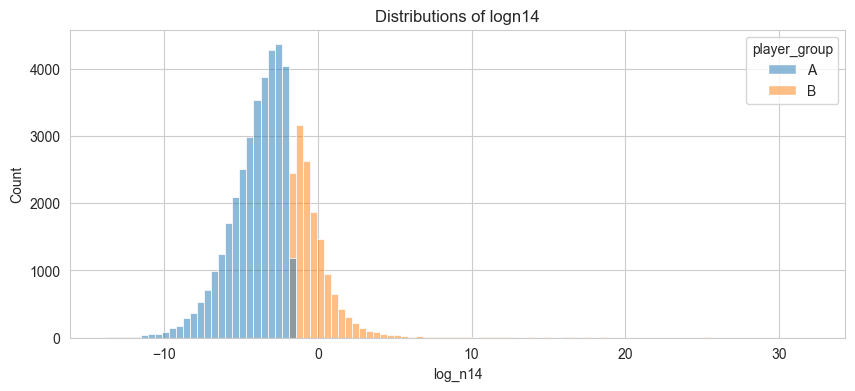

In [49]:
df['log_n14'] = np.log(df['n14'])
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x='log_n14', hue='player_group', stat='count', common_norm=False, bins=100)
plt.title(f'Distributions of logn14')
# plt.yscale('log')
plt.show()

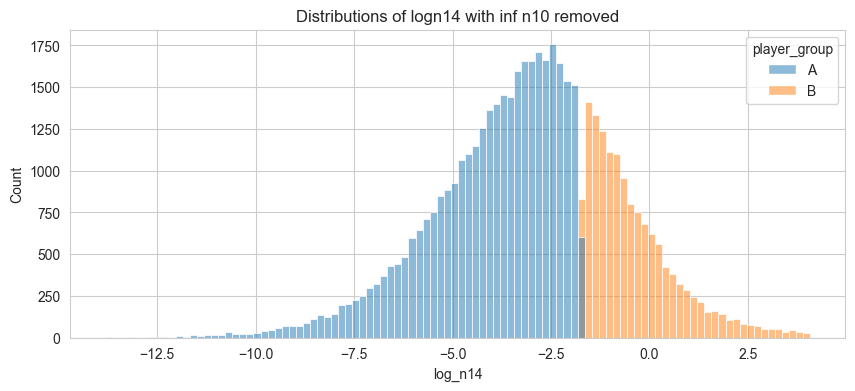

In [50]:
# Log transformed n14, with n10 infinites removed

df_noinf['log_n14'] = np.log(df_noinf['n14'])
plt.figure(figsize=(10, 4))
sns.histplot(data=df_noinf, x='log_n14', hue='player_group', stat='count', common_norm=False, bins=100)
plt.title(f'Distributions of logn14 with inf n10 removed')
# plt.yscale('log')
plt.show()

##  Numerical Features

Investigate the other pre-test numerical features, `n2` - `n12`.

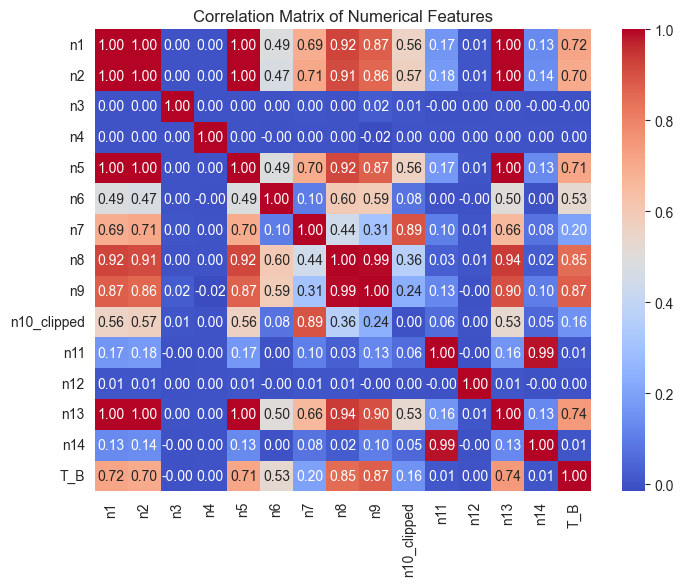

In [52]:
# Correlation matrix

# encode player group
df['T_B'] = (df['player_group'] == 'B').astype(int)
df['T_A'] = (df['player_group'] == 'A').astype(int)

# Clip n10 so we can visualise it 
percentile_value = df['n10'].quantile(0.99)
# Clip/cap the values at the percentile
df['n10_clipped'] = df['n10'].clip(upper=percentile_value)

corr_matrix = df[['n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10_clipped', 'n11', 'n12', 'n13', 'n14', 'T_B']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Engagement Outcome n13**

- Confounders: n1, n2, n5, n8 are highly correlated with outcome and treatment
    - n1, n2, n5, n8 also highly correlated with each other. This perfect correlation suggests that n2 and n5 are metrics either directly derived from n1 or so closely related that they mirror n1’s movements. As such, we could choose to only use `n1` without loss of information and to avoid multicollinearity in any regression analysis. 
- Covariates: 'n7' is correlated with 'n13', but has low correlation with treatment assignment. `n11` is a potential candidate here too, though the correlation with `n13` is mild.
- `n3`, `n4`, `n12` are not correlated with either outcome or treatment 
- `n6` has 0.5 correlation with both treatment and `n13`

**Monetization Outcome n14**

- Confounders: n1, n2, n5, n8, n9 are highly correlated with treatment, but much less correlated with n14 outcome than n13.
- Covariates: `n11` is highly correlated with outcome `n14`, but not with treatment.
- `n6`, `n7` not correlated with `n14` at all, but are correlated with treatment
- `n3`, `n4`, `n12` are not correlated with either outcome or treatment 


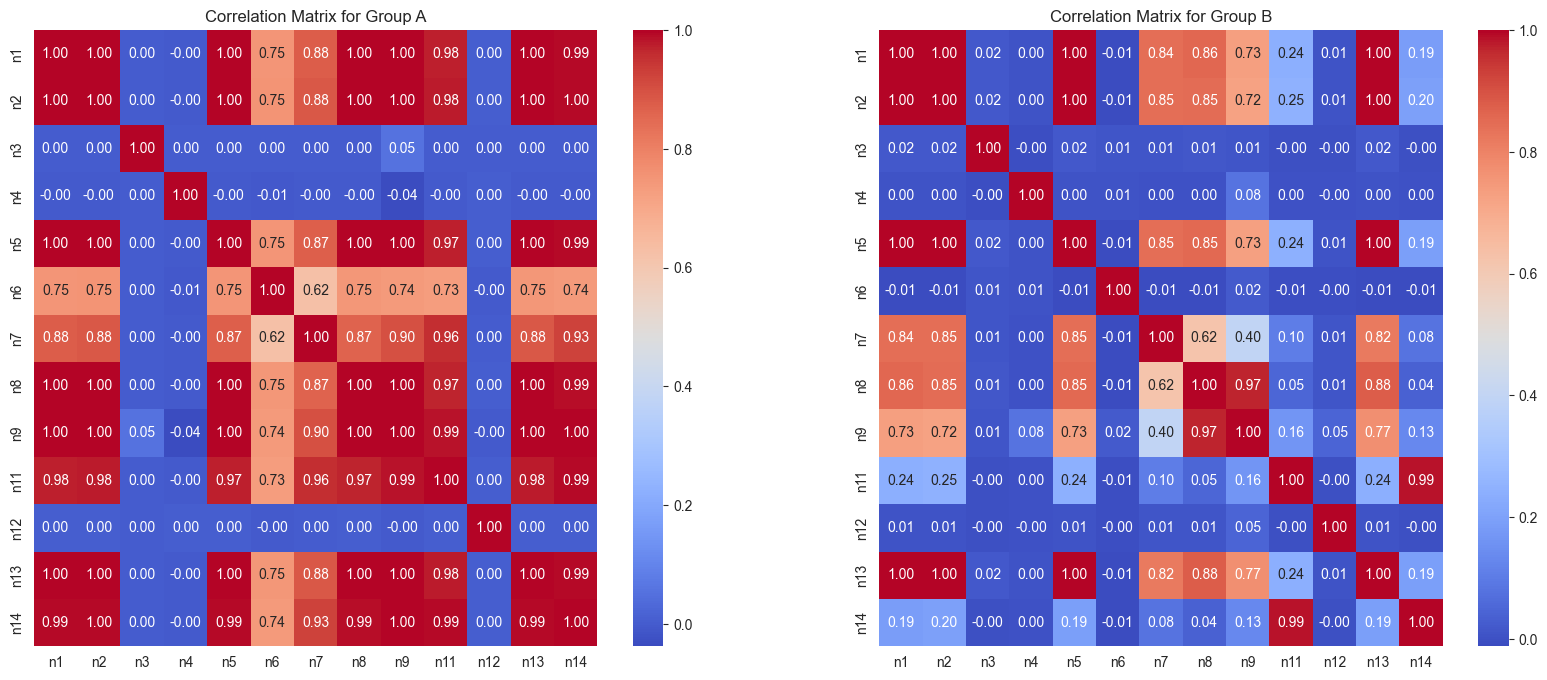

In [53]:
# Correlations split by player groups

group_a = df[df['player_group'] == 'A'].drop('player_group', axis=1)[['n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n11', 'n12', 'n13', 'n14']]
group_b = df[df['player_group'] == 'B'].drop('player_group', axis=1)[['n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n11', 'n12', 'n13', 'n14']]

corr_matrix_a = group_a.corr()
corr_matrix_b = group_b.corr()

# Set up the matplotlib figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Draw the heatmap for Group A
sns.heatmap(corr_matrix_a, ax=ax1, cmap='coolwarm', annot=True, fmt=".2f")
ax1.set_title('Correlation Matrix for Group A')

# Draw the heatmap for Group B
sns.heatmap(corr_matrix_b, ax=ax2, cmap='coolwarm', annot=True, fmt=".2f")
ax2.set_title('Correlation Matrix for Group B')

# Show the plots
plt.show()

**Group A Correlations:**
- n1, n2, n5, n7, n8, and n11 are highly correlated with each other.
- n13 and n14 also show high correlation with n1, n2, n5, n7, n8, and n11 (and n6)
- n3, n4, and n12 have very low or no correlation with any other features.

**Group B Correlations:**
The correlation pattern is notably different; there are less perfect correlations between features.
- n1, n2, n5, and n8 still show high correlation with each other and with n13.
- n14 shows much smaller correlation with n2, n5, n7, and n8.
- n11 highly correlated with n14 like in group A, but not with n13
- n3, n4, n6, and n12 show very low or no correlation with the engagement and monetization metrics n13 and n14, as for group A.

Main difference is that while in group A pre/during test engagement is highly correlated with monetization, Group B shows a more complex picture, where the pre-test measures are less predictive of during-test monetization, hinting at potentially more varied effects of the game design on different players.

## Investigating `n11` - highly correlated with post-test monetization

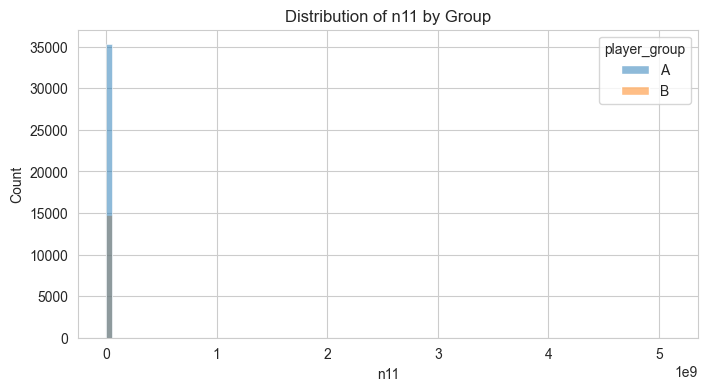

In [55]:
feature='n11'
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x=feature, hue='player_group', stat='count', common_norm=False, bins=100)
# sns.histplot(data=df[df['player_group']=='A'], x=feature, stat='count', common_norm=False, bins=100)
plt.title(f'Distribution of {feature} by Group')
# plt.yscale('log')
plt.show()

/Users/kathleenshort/poetry-project-test/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


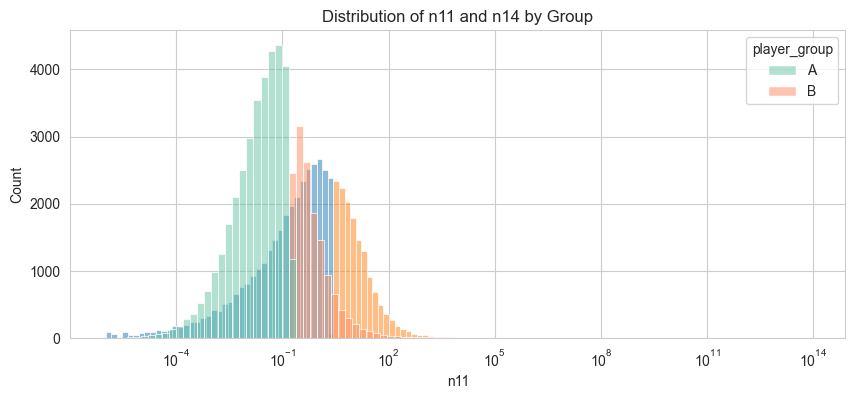

In [57]:
df['log_n11'] = np.log(df['n11'])
feature = 'n11'
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x=feature, hue='player_group', stat='count', common_norm=False, bins=100, log_scale=True)
sns.histplot(data=df, x='n14', hue='player_group', stat='count', common_norm=False, bins=100, log_scale=True, palette='Set2')
plt.title(f'Distribution of {feature} and n14 by Group')
plt.show()

In [58]:
df.groupby('player_group')[['n11', 'n14']].describe()

n11                                                   \
                count           mean           std       min       25%   
player_group                                                             
A             35280.0       0.518517  6.747064e-01  0.000000  0.024362   
B             14720.0  501563.445657  4.301045e+07  2.721357  4.823295   

                                                     n14                \
                   50%        75%           max    count          mean   
player_group                                                             
A             0.199177   0.779735  2.721200e+00  35280.0  4.191779e-02   
B             9.285429  22.779089  5.098116e+09  14720.0  5.959413e+09   

                                                                    \
                       std       min       25%       50%       75%   
player_group                                                         
A             4.452804e-02  0.000001  0.006444  0.024295  0.065159   
B             6.695068e+11  0.173297  0.279915  0.504498  1.234959   

                            
                       max  
player_group                
A             1.732890e-01  
B             8.112489e+13

`n11` has a similar distribution to `n14`, including the extreme outliers, so likely is related to pre-test monetization somehow. However `n11` has a minimum of zero, as you would expect for monetization metric.

## Distribution of other numerical features:

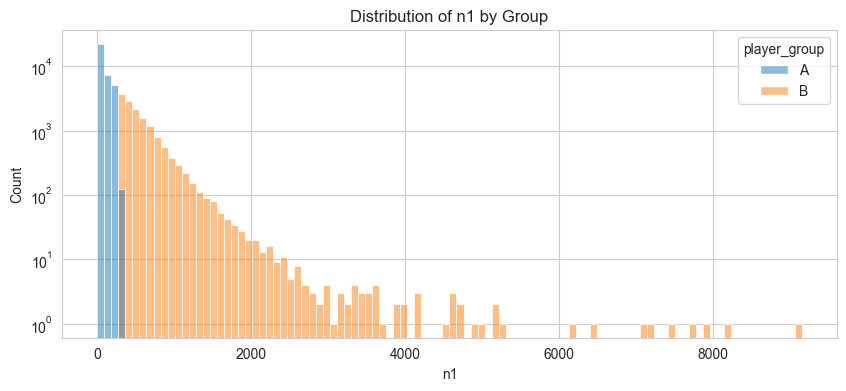

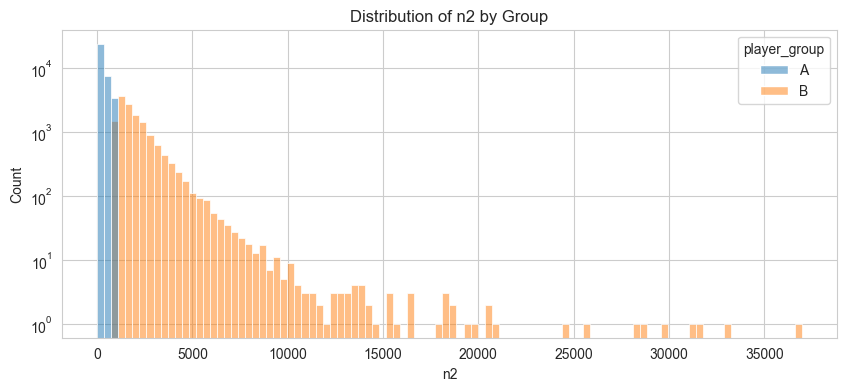

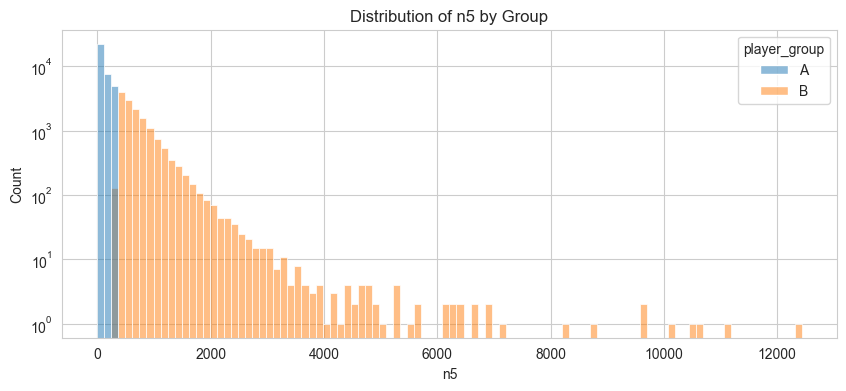

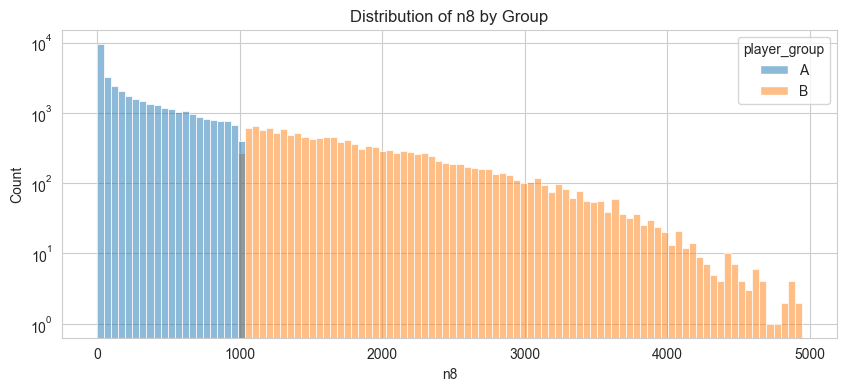

In [60]:
for feature in ['n1', 'n2', 'n5', 'n8']:
    plt.figure(figsize=(10, 4))
    sns.histplot(data=df, x=feature, hue='player_group', stat='count', common_norm=False, bins=100)
    plt.title(f'Distribution of {feature} by Group')
    plt.yscale('log')
    plt.show()

The distributions of n1, n2 and n5 appear very similar, aligning with the idea that these might all be very closely related metrics tracking engagement. However, the distribution of n8 is somewhat different, but could be a transformation of the engagement metric.

In [61]:
df.groupby('player_group')[['n1', 'n8']].describe()

n1                                                  \
                count        mean         std         min         25%   
player_group                                                            
A             35280.0   77.766107   80.046706   -1.000000    7.597781   
B             14720.0  586.641171  398.381076  276.182156  363.077131   

                                                        n8               \
                     50%         75%          max    count         mean   
player_group                                                              
A              48.303494  132.979942   276.174109  35280.0   302.535513   
B             479.858992  673.456624  9147.840007  14720.0  1897.062725   

                                                                              \
                     std          min          25%          50%          75%   
player_group                                                                   
A             295.342965    -1.000000    38.605749   204.894951   513.164740   
B             712.258398  1016.822308  1321.829040  1720.643994  2307.532059   

                           
                      max  
player_group               
A             1016.793995  
B             4943.121649

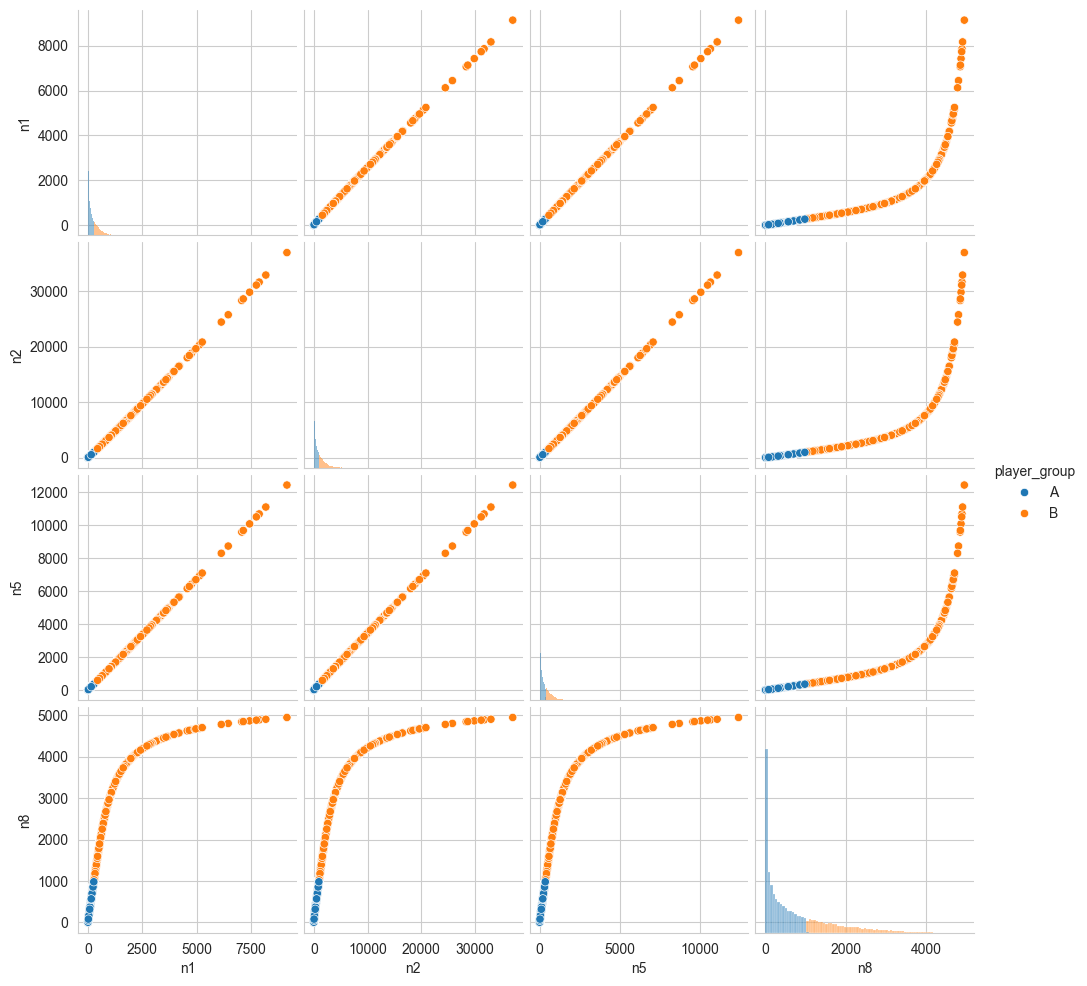

In [64]:
# Pairplot 

df_clean = df.drop(['n9', 'n10', 'c1', 'c2', 'c4', 'c6'], axis=1)
sns.pairplot(df_clean, vars=['n1', 'n2', 'n5', 'n8'], hue="player_group", diag_kind="hist")

Clear linear relationship between n1, n2, n5 reinforces the hypothesis that these are likely scaled versions of one another, and all measure player engagement on different scales.
The curve in relationship between n1 and 8 suggest a non-linear relationship. n8 potentially looks like a logarthmic function of n1.

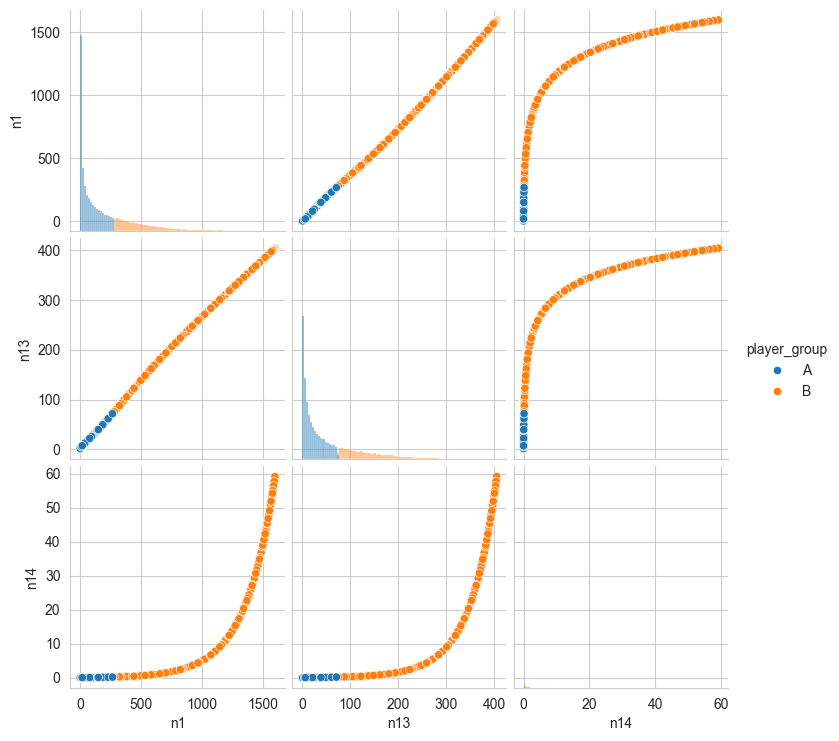

In [65]:
# # Capping outliers in n14 to visualise
# upper_limit = df[df["n10"] == np.inf]["n14"].describe()["min"]
# df["n14_capped"] = df["n14"].clip(upper=upper_limit)

# Plotting with n10 inf outliers removed
sns.pairplot(df_noinf, vars=['n1', 'n13', 'n14'], hue="player_group", diag_kind="hist")

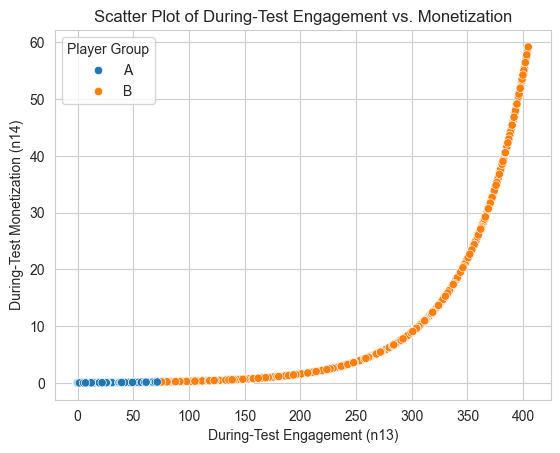

In [66]:
sns.scatterplot(data=df_noinf, x='n13', y='n14', hue='player_group')

plt.title('Scatter Plot of During-Test Engagement vs. Monetization')
plt.xlabel('During-Test Engagement (n13)')
plt.ylabel('During-Test Monetization (n14)')
plt.legend(title='Player Group')
plt.show()

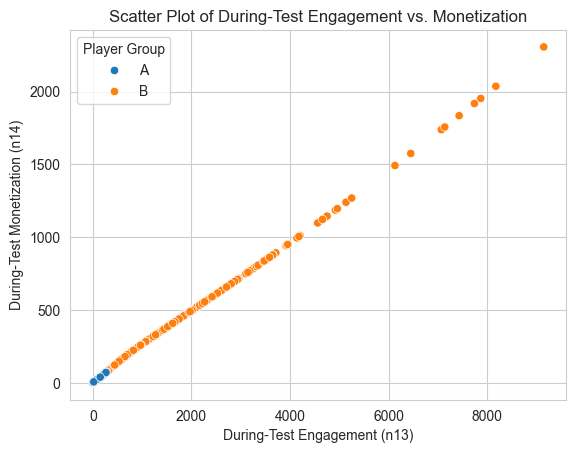

In [67]:
sns.scatterplot(data=df, x='n1', y='n13', hue='player_group')

plt.title('Scatter Plot of During-Test Engagement vs. Monetization')
plt.xlabel('During-Test Engagement (n13)')
plt.ylabel('During-Test Monetization (n14)')
plt.legend(title='Player Group')
plt.show()

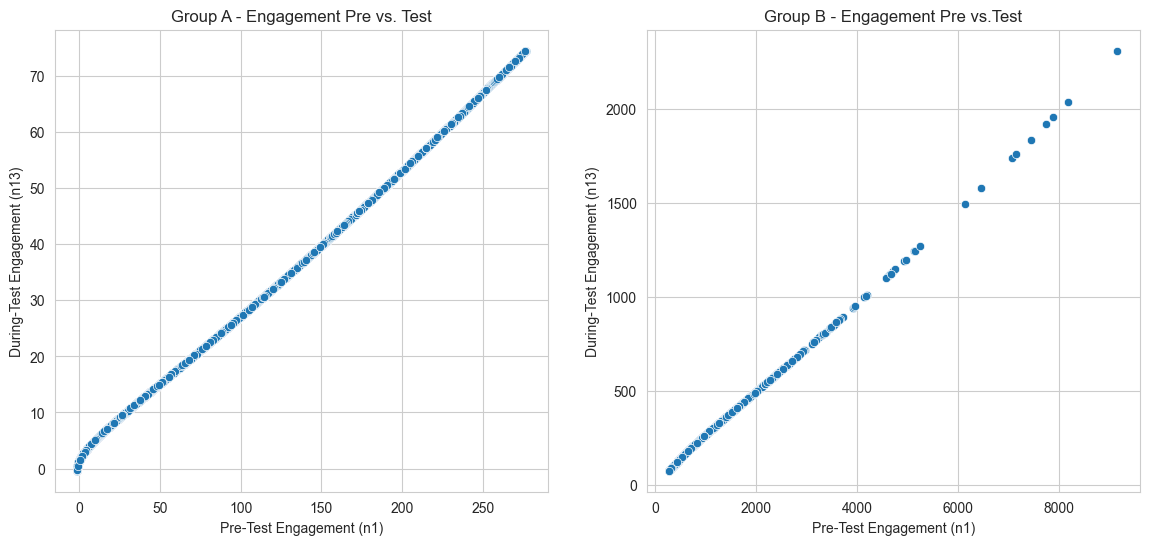

In [68]:
# Pre vs During Engagement Relationship across groups
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot for Group A
sns.scatterplot(ax=axes[0], data=df_clean[df_clean['player_group'] == 'A'], x='n1', y='n13')
axes[0].set_title('Group A - Engagement Pre vs. Test')
axes[0].set_xlabel('Pre-Test Engagement (n1)')
axes[0].set_ylabel('During-Test Engagement (n13)')
# axes[0].set_xlim(0, 100)

# Scatter plot for Group B
sns.scatterplot(ax=axes[1], data=df_clean[df_clean['player_group'] == 'B'], x='n1', y='n13')
axes[1].set_title('Group B - Engagement Pre vs.Test')
axes[1].set_xlabel('Pre-Test Engagement (n1)')
axes[1].set_ylabel('During-Test Engagement (n13)')
# axes[1].set_xlim(0, 100)

# Show plot with a tight layout
plt.show()

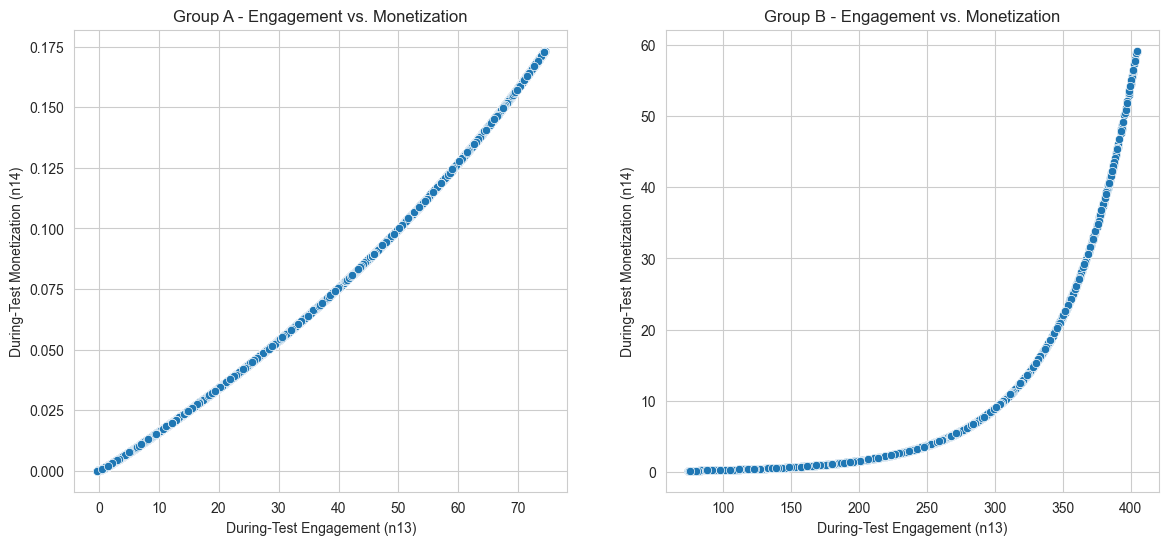

In [69]:
# Engagement vs Monetization Relationship across groups
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot for Group A
sns.scatterplot(ax=axes[0], data=df_noinf[df_noinf['player_group'] == 'A'], x='n13', y='n14')
axes[0].set_title('Group A - Engagement vs. Monetization')
axes[0].set_xlabel('During-Test Engagement (n13)')
axes[0].set_ylabel('During-Test Monetization (n14)')
# axes[0].set_xlim(0, 100)

# Scatter plot for Group B
sns.scatterplot(ax=axes[1], data=df_noinf[df_noinf['player_group'] == 'B'], x='n13', y='n14')
axes[1].set_title('Group B - Engagement vs. Monetization')
axes[1].set_xlabel('During-Test Engagement (n13)')
axes[1].set_ylabel('During-Test Monetization (n14)')
# axes[1].set_xlim(0, 100)

# Show plot with a tight layout
plt.show()

We see a mostly linear relationship between pre- and in-test engagement n1 and n13. Relationship between engagement and monetization is non-linear. 

1. n1 vs. n13 (Engagement before and during the test):
The plot between n1 and n13 shows a clear positive linear relationship for both player groups A and B, which indicates that players with higher pre-test engagement tended to also be more engaged during the test. This suggests a consistency in player behavior regarding engagement before and during the test period.

2. n1/n13 vs. n14 (Pre-test engagement and monetization during the test):
The relationship between n1/n13 and n14 appears to be nonlinear, with a curvilinear shape that suggests diminishing returns or a plateau effect as engagement increases. Initially, increases in engagement seem to be associated with increases in monetization, but this relationship levels off at higher levels of engagement. The pattern seems to start with a slow increase in monetization as engagement increases, which then accelerates in the middle range of engagement levels before tapering off or plateauing at higher levels of engagement. This might imply that after a certain point, more engaged players do not necessarily spend more during the test, or there could be a saturation point beyond which the monetization does not increase proportionally with engagement.

This could suggest:

- Initial Hesitation: Players start off cautiously, with increased engagement not immediately leading to increased spending.
- Engagement Threshold: After a certain point, players become more deeply engaged or invested in the game, leading to a rapid increase in spending.
- Saturation Point: Once a certain level of engagement is reached, the players either reach their spending limit or the additional engagement does not translate to further increases in spending due to a ceiling effect.



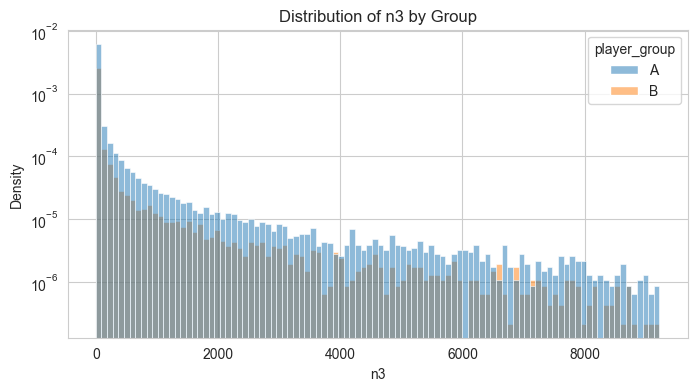

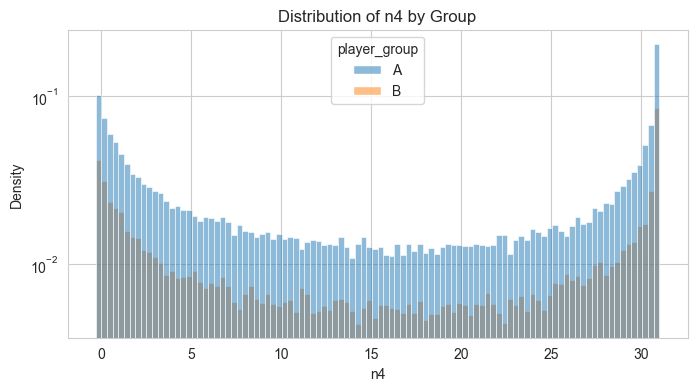

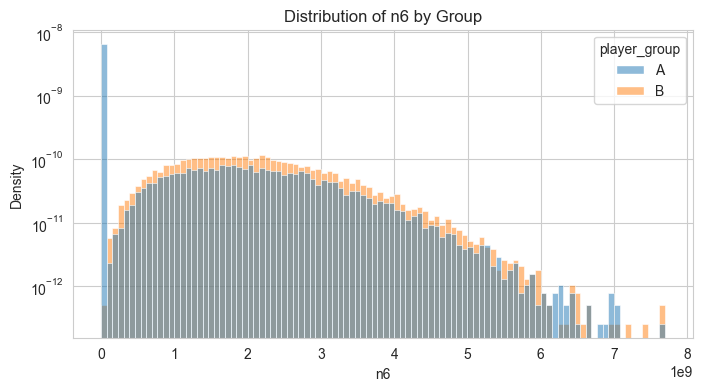

In [70]:
for feature in ['n3', 'n4', 'n6']:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=feature, hue='player_group', stat='density', bins=100)
    plt.title(f'Distribution of {feature} by Group')
    plt.yscale('log')
    plt.show()

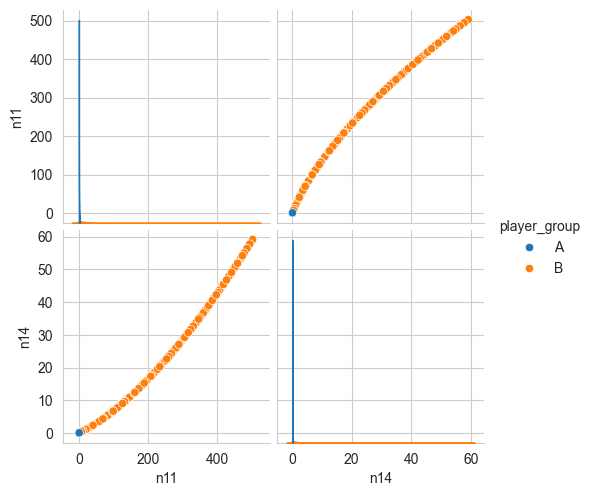

In [71]:
sns.pairplot(df_noinf, vars=['n11', 'n14'], hue="player_group")

## Categorical Features 

In [72]:
cat_cols = ['c1', 'c2', 'c3', 'c4', 'c5', 'c6']
# number of categories of each categorical feature
for col in cat_cols:
    print(col, df[col].nunique())

c1 174
c2 4
c3 29
c4 268
c5 2
c6 35


In [73]:
# Use Chi-squared test to check for independence between categorical features and player groups
from scipy.stats import chi2_contingency

for column in ['c1', 'c2', 'c3', 'c4', 'c5', 'c6']:
    contingency_table = pd.crosstab(df[column], df['player_group'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"{column} vs player_group - Chi-squared test results: chi2 = {chi2}, p-value = {p}")

c1 vs player_group - Chi-squared test results: chi2 = 44301.692810414985, p-value = 0.0
c2 vs player_group - Chi-squared test results: chi2 = 26628.163803241845, p-value = 0.0
c3 vs player_group - Chi-squared test results: chi2 = 49990.38125915564, p-value = 0.0
c4 vs player_group - Chi-squared test results: chi2 = 40026.736998879736, p-value = 0.0
c5 vs player_group - Chi-squared test results: chi2 = 102.17705053072247, p-value = 5.077473388287667e-24
c6 vs player_group - Chi-squared test results: chi2 = 42328.60578628116, p-value = 0.0


In [74]:
# Get unique categories per treatment group
for col in cat_cols:
    categories_group_A = set(df[df['player_group'] == 'A'][col].unique())
    categories_group_B = set(df[df['player_group'] == 'B'][col].unique())
    # Find intersection of categories present in both groups
    common_categories = categories_group_A.intersection(categories_group_B)
    print(f"Common categories in {col}:", common_categories)

Common categories in c1: {'Q0E'}
Common categories in c2: {'aW9z'}
Common categories in c3: {'cHQ'}
Common categories in c4: {'aHVhd'}
Common categories in c5: {True}
Common categories in c6: {'KzAzOjAw'}


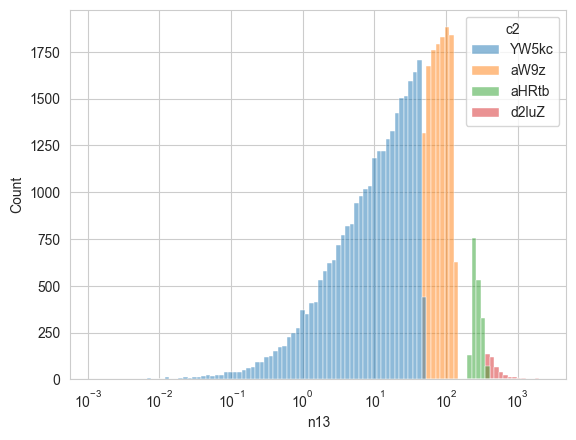

In [75]:
sns.histplot(data=df, x='n13', hue='c2', bins=100, log_scale=True)
plt.show()

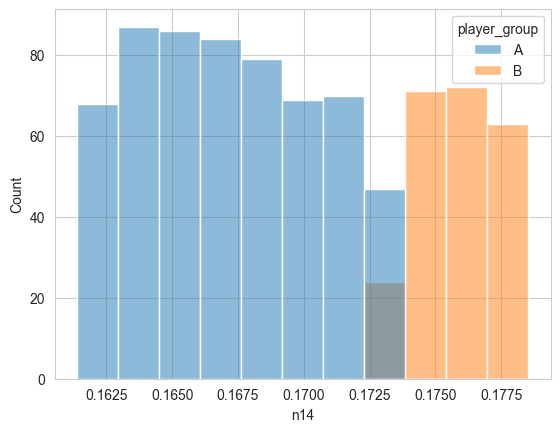

In [76]:
sns.histplot(data=df[df['c1']=='Q0E'], x='n14', hue='player_group')
plt.show()

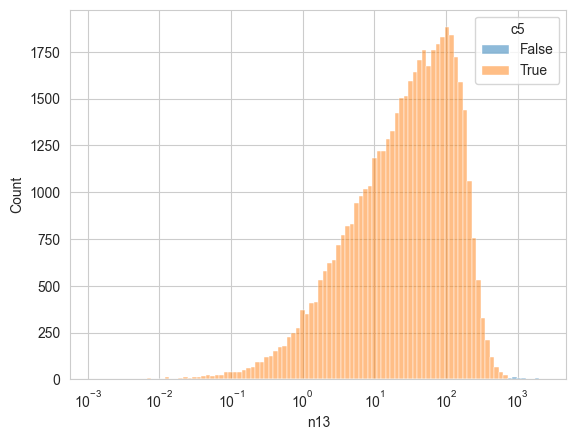

In [77]:
sns.histplot(data=df, x='n13', hue='c5', bins=100, log_scale=True)
plt.show()

**Summary:**

- We only have one common category in both groups across all categorical features
- 44 players where c5 is False represent the 44 most extreme outliers in terms of n1, n13, n14